# tests ESOINN

### ESOINN node class
##### Fields
* feature_vector – weights
* accamulate_signals – number of signals
* total_points – points $\neq$ number of signals
* density – mean accumulated signals
* subclass_id – mark for subclass

### ESOINN Neural Network class
To start lerning use: `fit()` method, for clasterization use `predict()`.

##### Params:
To create new `EnhancedSelfOrganizingIncrementalNN` object – initialize it with first two nodes (`init_nodes`) randomly.

##### Hiperparams:
* `C1`, `C2` – coefficents for noise deletion.
* `learning_step` – number of iterations before remove old ages and find classes ($\lambda$ in literature).
* `max_age` – for edges.
* `forget` – specify which N is used in density calculation.
* `metrics` – lambda(x, y, axis)
* `radius_cut_off` – degree of neighbors' nodes.
* `learning_rate_winner` 
* `learning_rate_winner_neighbor`

##### Fields:
* `ids` – last given id for nodes (should be unique).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from dev import ESOINN

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
def display_nodes(nodes: dict, plot=True, log=False):
    if plot:
        x, y, mark = [], [], []
        for node_id in nodes:
            features = nodes[node_id].feature_vector
            x.append(features[0])
            y.append(features[1])
            mark.append(nodes[node_id].subclass_id)
        plt.scatter(x, y, c=mark, s=100)
        plt.title("Topology")
    if not log:
        return
    print("TEST: nodes, feature vector and density:")
    for node_id in nodes:
        node = nodes[node_id]
        print(f"node {node_id} : {node.feature_vector} | density {node.density}")
    print()
        
def display_neighbors(neighbors: dict):
    print("TEST: neighbours for nodes:")
    for i in neighbors:
        print(f"neighbors for node {i} = {neighbors.get(i, None)}")
    else:
        print("END")
    print()
        
def display_edges(edges: dict, nodes: dict, plot=True, log=False):
    if plot:
        for edge in edges:
            x, y = [], []
            for node_id in edge:
                node_features = nodes[node_id].feature_vector
                x.append(node_features[0])
                y.append(node_features[1])
            plt.plot(x, y)
    if not log:
        return
    print("TEST: edges between nodes")
    for edge in edges:
        print(f"edge between {edge}: {edges[edge]}")

(-1, 0.75974692664795795)

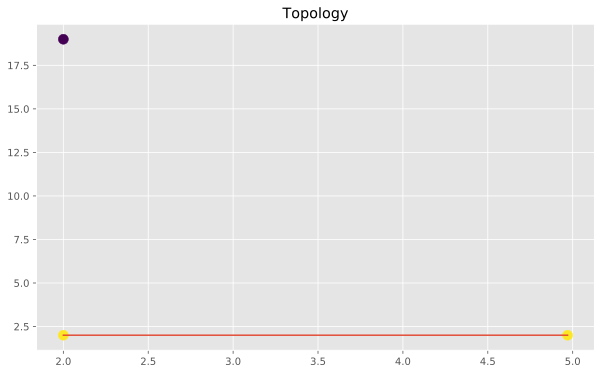

In [39]:
trace = False
nn = ESOINN.EnhancedSelfOrganizingIncrementalNN([[1, 2], [5, 2]])
signals = [
    [2, 2],
    [2, 19]
]

for signal in signals: 
    nn.fit(signal)

# test for old edge removal
# nn.edges[(0,1)] = 51
# nn.remove_old_ages()

nn_info = nn.current_state()  # this is more correct

display_nodes(nn_info['nodes'], log=trace)
if trace:
    display_neighbors(nn_info['neighbors'])
display_edges(nn_info['edges'], nn_info['nodes'], log=trace)

nn.predict([3, 15])

# nn.remove_noise()

# nn_info = nn.current_state()  # this is more correct

# display_nodes(nn_info['nodes'])
# display_neighbors(nn_info['neighbors'])